"Image Filter Operations with Python and OpenCV"

This notebook demonstrates various linear filter operations on an image using the OpenCV library in Python. It explores filters for blurring, including Box, Gaussian, Median, and Bilateral filters commonly used in image processing for smoothing and edge detection. Additionally, the notebook covers filters for image sharpening, such as Laplacian, Unsharp, and Sobel/Prewitt filters, which enhance edges and fine details. Furthermore, noise reduction filters are showcased, illustrating how techniques like Gaussian smoothing can effectively mitigate image noise. The notebook provides a comprehensive overview of these filter operations, offering practical insights into image processing techniques for diverse applications.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

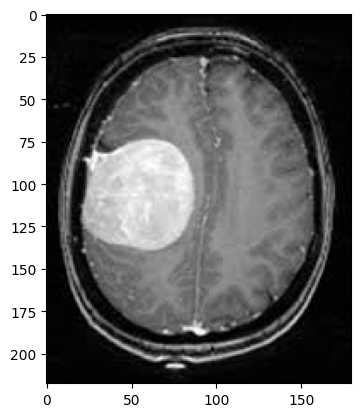

In [12]:
img = cv2.imread("Y1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Box Filter: A simple blurring filter that replaces each pixel's value with the average of its neighboring pixels, producing a uniform smoothing effect.

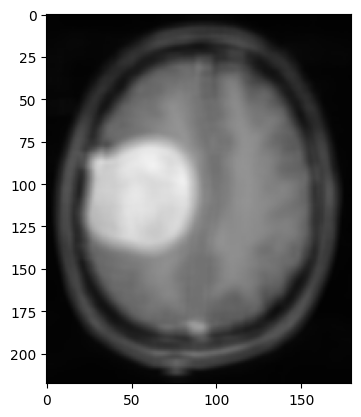

In [13]:
# Box Filter

img = cv2.imread("Y1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ksize = (10, 10)  
img = cv2.boxFilter(img,ksize=ksize,ddepth=3) 

plt.imshow(img)

Gaussian Filter: Applies a weighted average to pixels based on their distance from the center, creating a smoother and more natural blurring compared to the Box filter.

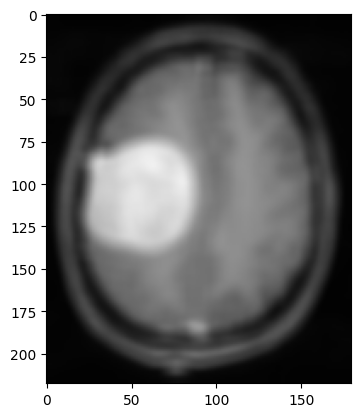

In [14]:
# Gaussian Blur
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

Median Filter: Replaces each pixel value with the median value of its neighboring pixels, effective in reducing salt-and-pepper noise while preserving edges.

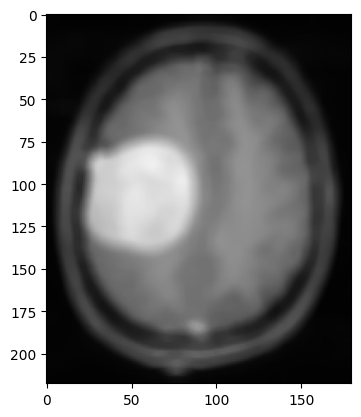

In [15]:
# Median Blur
median = cv2.medianBlur(img,5)
plt.imshow(median)

Bilateral Filter: Combines spatial and intensity information, smoothing the image while preserving edges by considering both pixel proximity and intensity differences.

In [16]:
#Bilateral Filter

img = cv2.imread('Y1.jpg')
bilateral = cv2.bilateralFilter(img, 15, 75, 75)

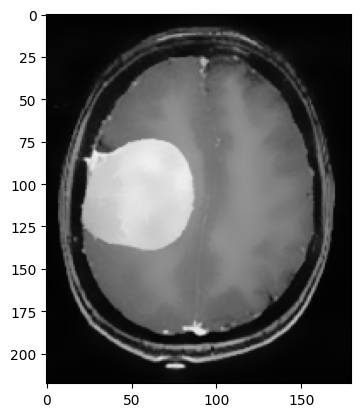

In [17]:
plt.imshow(bilateral)

In [20]:
img = cv2.imread("Y1.jpg")
source_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Laplacian Filter: Enhances edges by highlighting rapid intensity changes, accentuating details and edges in the image.

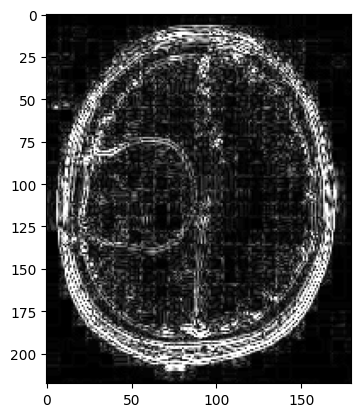

In [21]:
# Laplacian
dest = cv2.Laplacian(source_gray, cv2.CV_64F, ksize=3)
abs_dest = cv2.convertScaleAbs(dest)
plt.imshow(abs_dest, cmap="gray")

Unsharp Masking: Improves image sharpness by subtracting a blurred version (usually Gaussian) from the original, emphasizing high-frequency components.

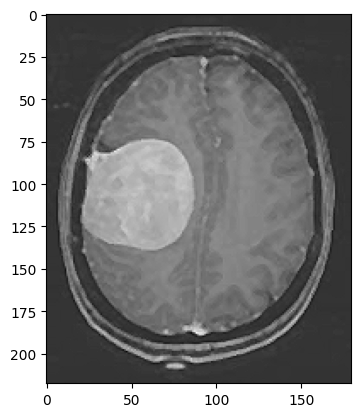

In [22]:
# Unsharp

median = cv2.medianBlur(source_gray,5)
lap = cv2.Laplacian(median, cv2.CV_64F)
sharp = source_gray - 0.7 * lap

plt.imshow(sharp,cmap = "gray")

Sobel and Prewitt Filters: Emphasize vertical and horizontal edges, respectively, by convolving the image with Sobel or Prewitt kernels.

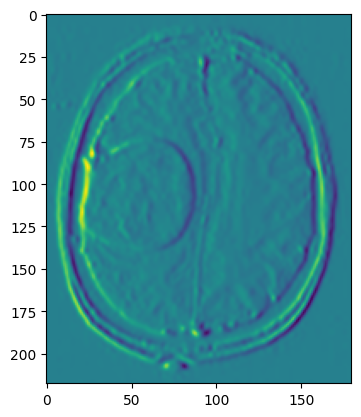

In [25]:
# sobel

img = cv2.imread("Y1.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

plt.imshow(sobelx)

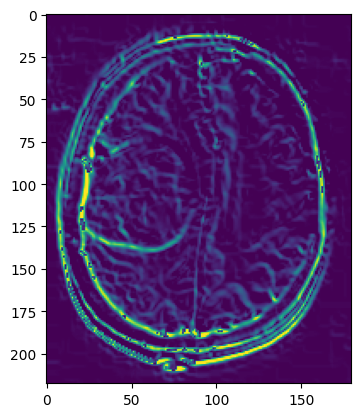

In [26]:
# Prewitt

img = cv2.imread('Y1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

plt.imshow(img_prewittx + img_prewitty)

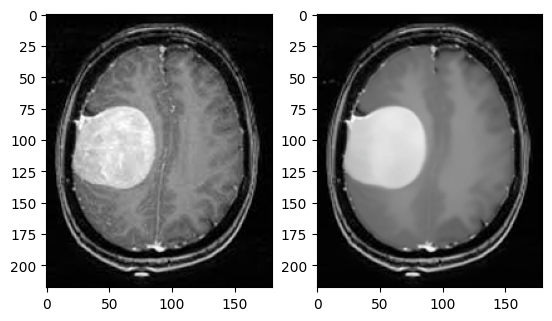

In [27]:
# Denoising

img = cv2.imread("Y1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()